<a href="https://colab.research.google.com/github/Liang130520/Tibame-Machine-Learning/blob/main/class1027_machine_learning_cluster_4_scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
" 分群 "
# 沒有答案的選擇題, 用特徵去做分類 
# 距離非固定算法, 有許多不同情況的算法 

import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df

In [ ]:
" K Means " # K 個 中心(每個中心跟相關點的距離最近)
# 迭代法：隨機選 3 個中心 --> 所有點依距離分配給 K 中心 --> (分群固定) 重新選新的 K 中心 [發現中心與距離距離不妥] --> 所有點依距離分配給 K 中心 {不斷重複step2, 3, 直到中心點不變或變動不大}

" K Means ++ " # 一開始選的點盡量分地遠點, 較容易收斂分群結果

In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 3)
cluster.fit(df)
# 可參考 https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# class sklearn.cluster.KMeans(n_clusters=8,
#                              *,
#                              init='k-means++',
#                              n_init=10,
#                              max_iter=300, # iter 即為迭代幾次
#                              tol=0.0001,
#                              verbose=0,
#                              random_state=None,
#                              copy_x=True,
#                              algorithm='lloyd'
#                              )

In [ ]:
# 把分群完的答案存起來, 亦即為我自己分出答案, 然後這就是我得到的解答
df["labels"] = cluster.labels_
df

In [ ]:
" K 的中心點 "
# sklearn 最後會取得虛擬中心, 原資料無小數後兩位, 而此結果為小數後多位
cluster.cluster_centers_

In [ ]:
" 信心程度 "
# 令 A, B, C為三大群, Pa 為 A 中一點, 則 Pa 與 A 的親近程度越小越好, 與其他大群的疏遠程度越大越好
# 親近程度：a = 所在群所有點m{所在群j所有點與Pa距離相加[(Pa,所在群j) ** 2] * 1/n} * 1/m
# 疏遠程度：b = 所在群所有點m{所在群k所有點與Pa距離相加[(Pa,非所在又最近群k) ** 2] * 1/t} * 1/m

" silhouette score " # 1 - a/b
# a/b = a * 1/b, 期望 a 為min, 1/b 為min, 可取得最大信心程度
# if a/b = 0 --> a = 0, b = 無限大
# if a/b = 1 --> a = b, 即「所在群j中所有點到其餘點距離」與「所在群j中所有點到非所在又最近群k中所有點距離」相同, 亦即所有點皆有其剛好同等距離的對應中心, 信心程度恰為50% (瞎猜意義)

In [15]:
# 未知 K：把所有 K 試過一遍, 看每個 K 選完的親疏程度, range()內為分幾群, 信心程度大於0.5即可作為參考
from sklearn.metrics import silhouette_score
for testk in range(2, 20):
  testcluster = KMeans(n_clusters = testk)
  testcluster.fit(iris["data"])
  score = silhouette_score(iris["data"], testcluster.labels_)
  print(testk, score)

2 0.6810461692117462
3 0.5528190123564095
4 0.4974551890173751
5 0.4930804067193521
6 0.3655218859995459
7 0.3566882476581695
8 0.35193407152280104
9 0.3258120848307356
10 0.3049952729268938
11 0.31456573931530385
12 0.28192355893728377
13 0.28148584226023265
14 0.2747750982197793
15 0.28467985055382483
16 0.2950476176500139
17 0.2828372030510049
18 0.29547067065276955
19 0.29869825702030384


In [17]:
# df[]
# numpy array：每個軸分開操作
# iris["data"].shape # 知道二維數據為(150, 4)
# iris["data"][:100, 0] # 類似 list 取法, 第二軸中第一項, 第一軸前100點
# s1 = iris["data"][:, 0]
# s2 = iris["data"][:, 1]
# s3 = iris["data"][:, 2]
# s4 = iris["data"][:, 3]

(150, 4)

AxesSubplot(0.125,0.125;0.775x0.755)


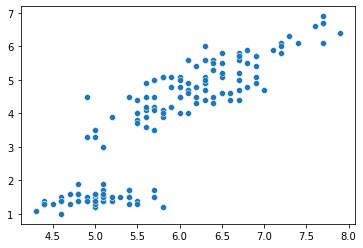

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# scatterplot 散布圖
s1 = iris["data"][:, 0]
p1 = iris["data"][:, 2]
sns.scatterplot(x = s1, y= p1) # cluster 的結果, 可執行參考
# sns.scatterplot(x = s1, y= p1, hue = iris["target"]) # 正確解答
